### install required libraries

In [1]:
! pip install efficientnet_pytorch
! pip install pytorch_model_summary
! pip install tensorboard
! pip install config

In [2]:
import os
os.chdir("C://Users//malvi//ML_project//table_net//TableNet-pytorch-main//TableNet-pytorch-main//Training")

### Importing Libraries

In [1]:
import torch
import cv2
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import config
import os
from utils import (
    get_data_loaders,
    load_checkpoint,
    save_checkpoint,
    display_metrics,
    write_summary, 
    compute_metrics,
    get_TableMasks,
    fixMasks,
    display
    
    )
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from model import TableNet
from pytorch_model_summary import summary
import tensorboard
from sklearn.model_selection import train_test_split
import albumentations as A 
from albumentations.pytorch import ToTensorV2

### Loading Best Model (Densenet)

In [2]:
model = TableNet(encoder = 'densenet', use_pretrained_model = True, basemodel_requires_grad = True)
model = model.to(config.DEVICE)

#load checkpoint
_,_,_ = load_checkpoint(torch.load("densenet_config_4_model_checkpoint.pth.tar"), model)

Loading checkpoint...


### Importing Test data

In [3]:
processed_data = pd.read_csv(config.DATAPATH)
_, test_data  = train_test_split(processed_data, test_size = 0.2, random_state = config.SEED, stratify = processed_data.hasTable)

### Generate output of 10 images

Test Image : 1


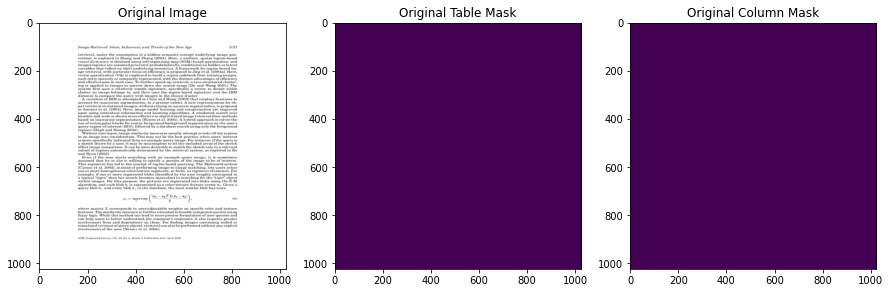

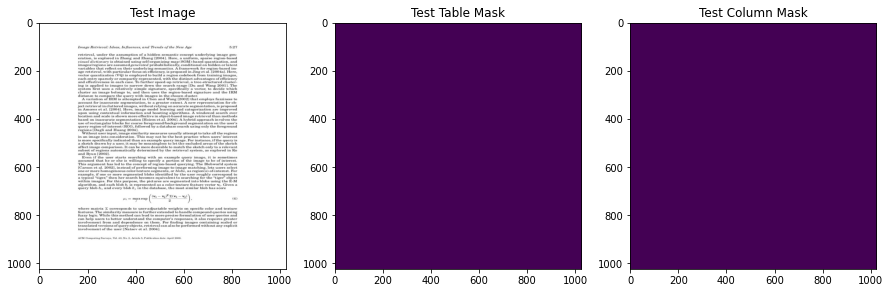

Test Image : 2


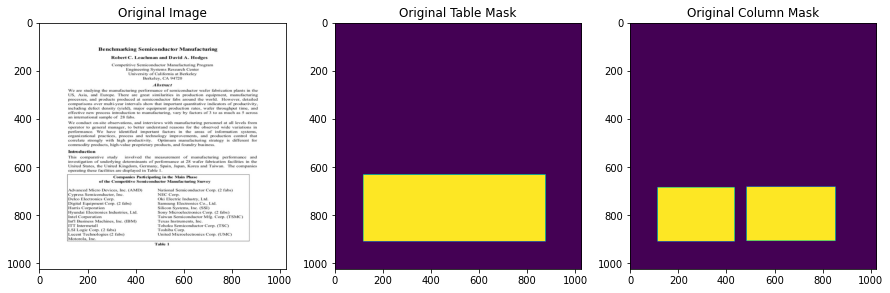

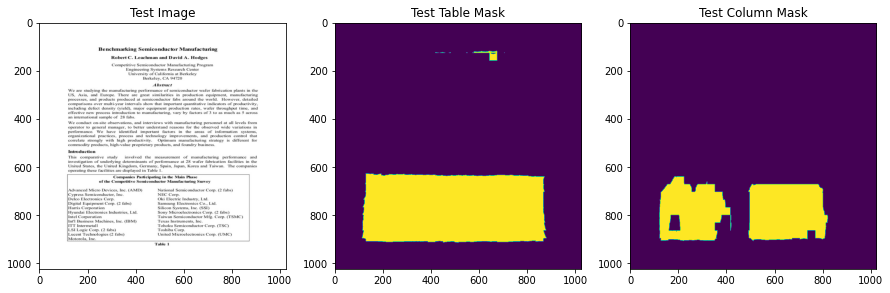

Test Image : 3


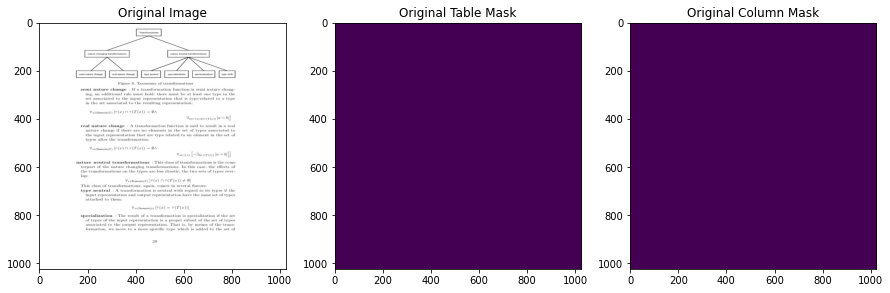

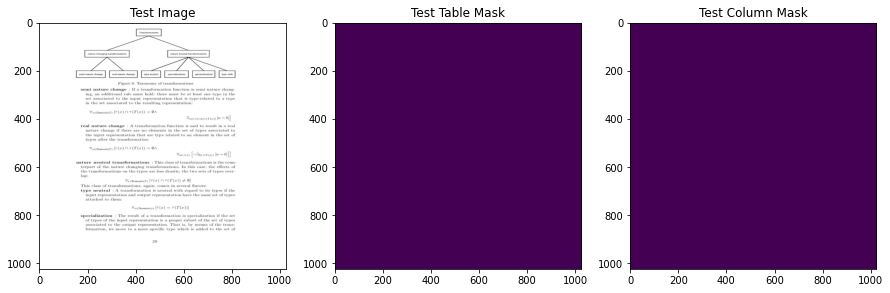

Test Image : 4


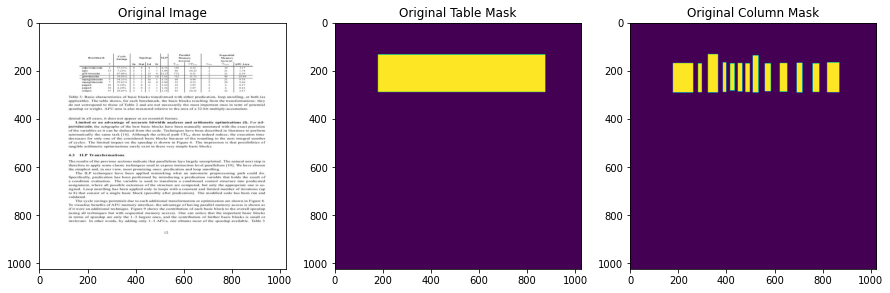

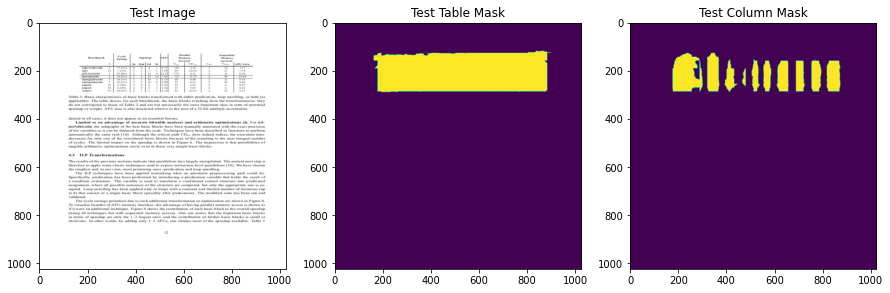

Test Image : 5


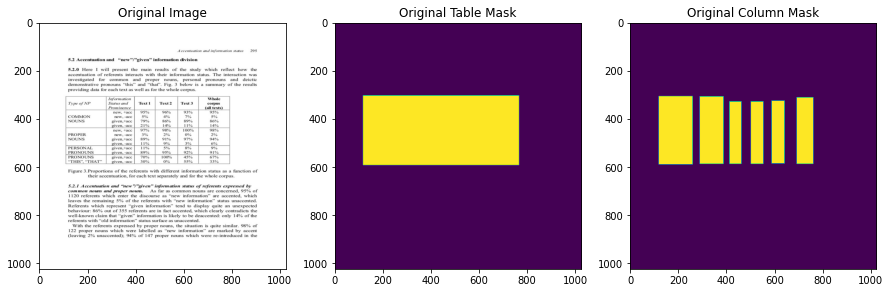

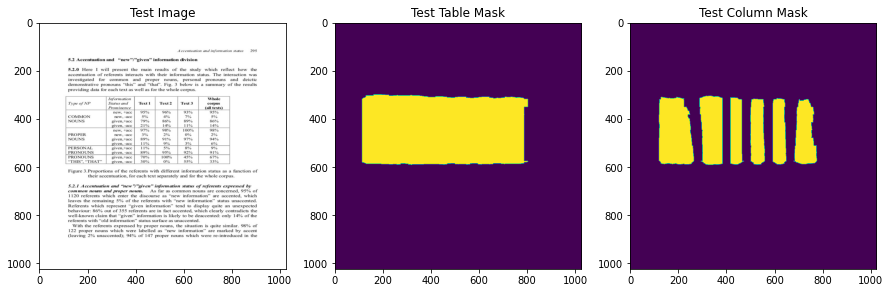

Test Image : 6


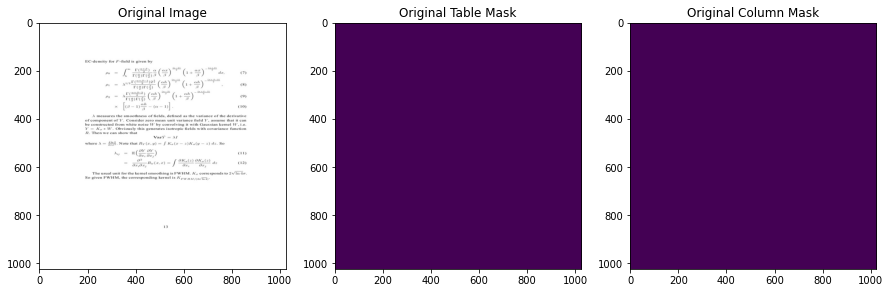

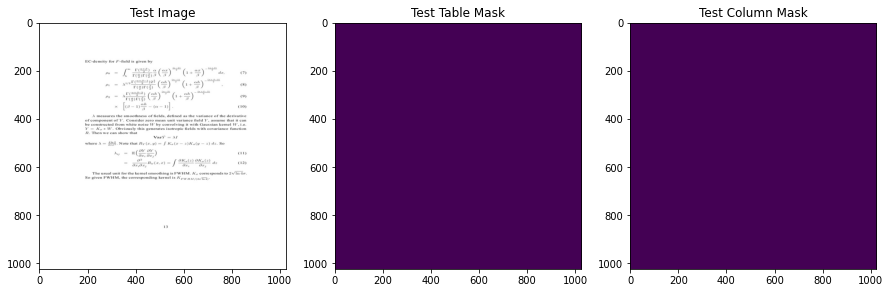

Test Image : 7


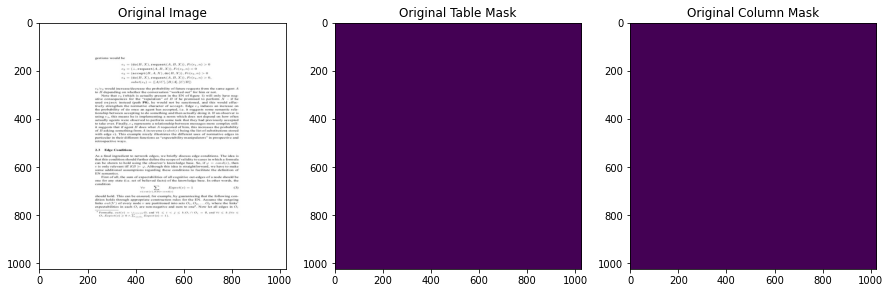

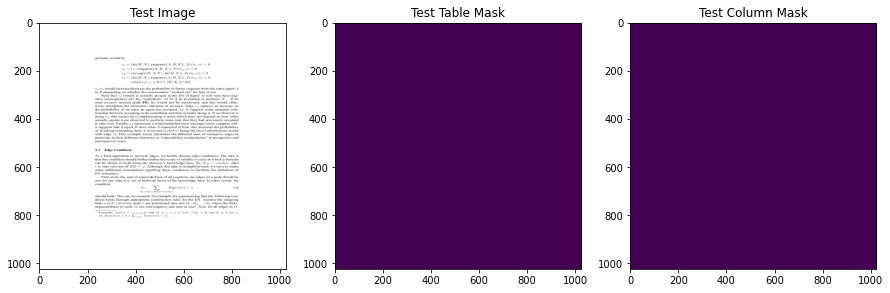

Test Image : 8


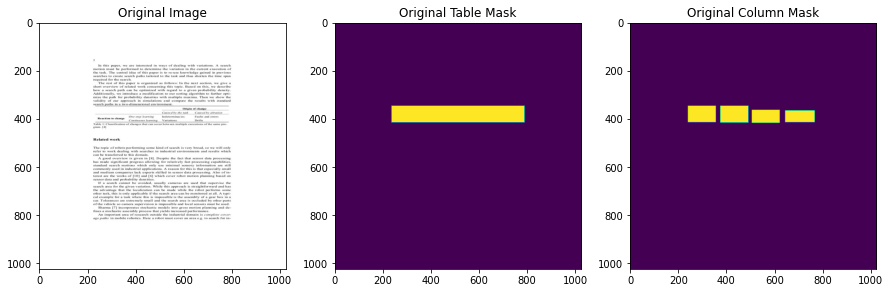

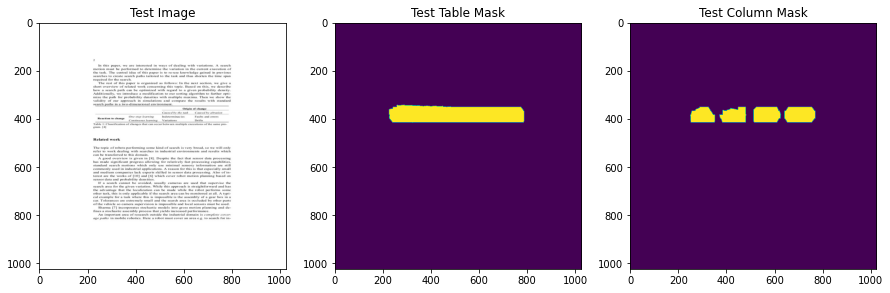

Test Image : 9


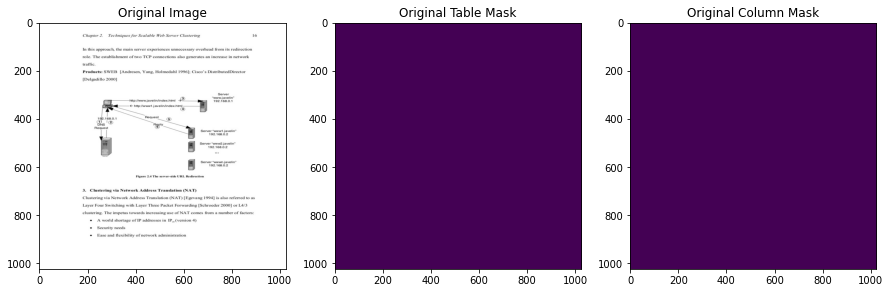

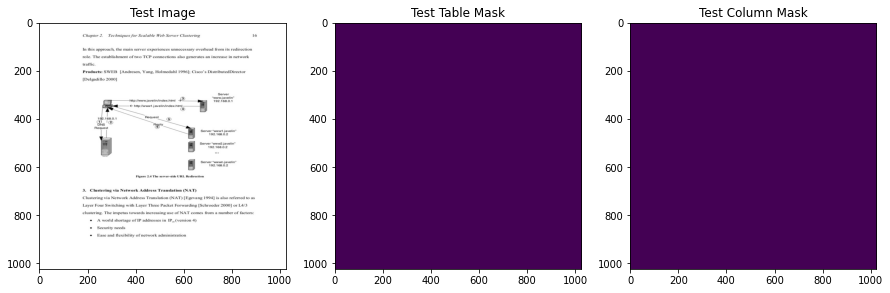

Test Image : 10


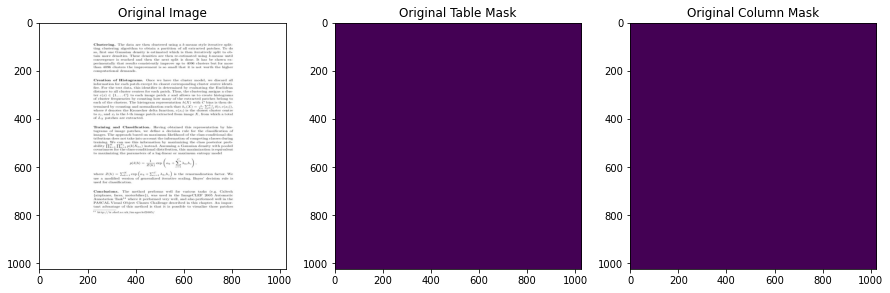

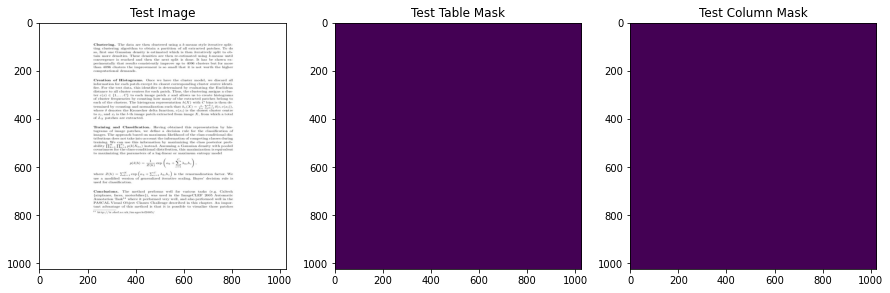

In [4]:
for i in range(10):
    
    print("Test Image :",i+1)
    test_img = np.array(Image.open('../'+ test_data.iloc[i,0]))
    test_table = np.array(Image.open('../'+ test_data.iloc[i,1]))
    test_col = np.array(Image.open('../'+ test_data.iloc[i,2]))

    display(test_img, test_table, test_col, title = 'Original')
    
    table_out, column_out = get_TableMasks(test_img, model)
    
    display(test_img, table_out, column_out, title = 'Test')

### Predicting The Tables and Extracting Information

In [5]:
import pytesseract
from io import StringIO

pytesseract.pytesseract.tesseract_cmd = r'C:/Program Files/Tesseract-OCR/tesseract.exe'

In [6]:
def getPredictions(image, table_boundRect):
    #Get output of multiple Tables in an Image and save it to csv

    for i,(x,y,w,h) in enumerate(table_boundRect):
        image_crop = image[y:y+h,x:x+w]
        plt.figure()
        plt.imshow(image_crop)
        plt.show()
        data = pytesseract.image_to_string(image_crop)
        df = pd.read_csv(StringIO(data),sep=r'\|',lineterminator=r'\n',engine='python')
        df.to_csv(f'Table_{i+1}.csv')
        print(df)

## 1. sample test dataset

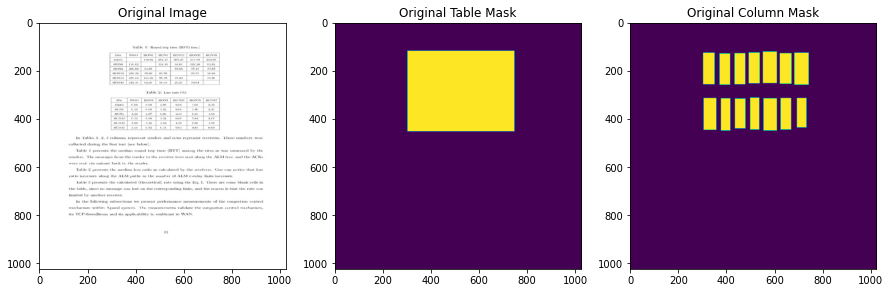

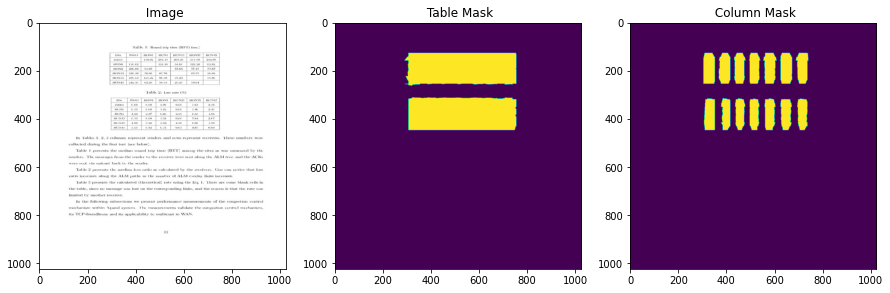

In [7]:
test_img = np.array(Image.open('../'+ test_data.iloc[10,0]))
test_table = np.array(Image.open('../'+ test_data.iloc[10,1]))
test_col = np.array(Image.open('../'+ test_data.iloc[10,2]))

display(test_img, test_table, test_col, title = 'Original')

table_out, column_out = get_TableMasks(test_img, model)
display(test_img, table_out, column_out, title = '')

##### Preprocessing the data and output of the result

In [8]:
outputs = fixMasks(test_img, table_out, column_out)

if outputs is None:
    
    print("No Tables Found")

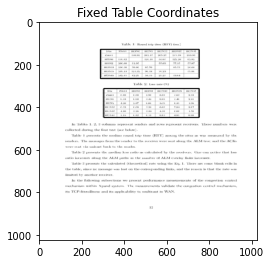

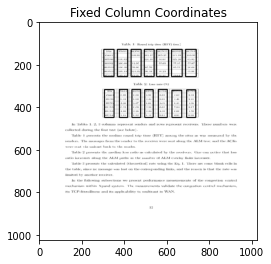

In [9]:
test_image = test_img[...,0].reshape(1024, 1024).astype(np.uint8)

image, table_boundRect, col_boundRects = outputs

#draw bounding boxes of Table Coordinates
color = (0,255,0)
thickness = 4

t_image = test_image.copy()
for x,y,w,h in table_boundRect:
    t_image = cv2.rectangle(t_image, (x,y),(x+w,y+h), color, thickness)

#plot bounding box using table mask
plt.figure()
plt.imshow(t_image, cmap = 'gray')
plt.title('Fixed Table Coordinates')
plt.show()

#Fix Column Coordinates

t_image = test_image.copy()
for c_bbox in col_boundRects:
    for x,y,w,h in c_bbox:
        t_image = cv2.rectangle(t_image, (x,y),(x+w,y+h), color, thickness)

#plot bounding box using table mask
plt.figure()
plt.imshow(t_image, cmap = 'gray')
plt.title('Fixed Column Coordinates')
plt.show()

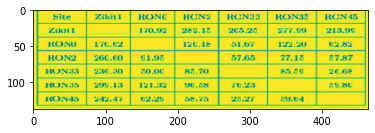

                                                     Eales
s RONC        RON2        RONS         RONSE         RONA5
went 110.92   28215       205.25       aveco         213.0
KONG          17.02 mua   orev         1220            eae
RON2          260.60      61.95 3765   774s           8787
ONas          2a¢.30      F000         82.70 eoes     2668
HONGS veces   vexs euau  NaN          NaN             None
HONAS oer     zezr        snea        NaN             None


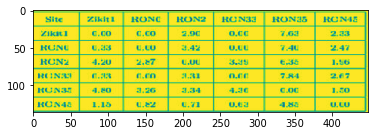

    site   znitt    Rone   RON2          RON3a    RONaS    RONAZ
0   went     ceo     ceo    290     oce 168 288      NaN     NaN
1   Kone     oss     coo    saz     one 7au zai      NaN     NaN
2   Renz      40    227 [   coo        sav 8 16      NaN     NaN
3   kona     ean      en    aaa      ace TR 267      NaN     NaN
4  wons:     aso     azo    asa    ase coe 1.20      NaN     NaN
5  woNae     120     cee     on      vex ase uw      NaN     NaN


In [10]:
getPredictions(test_image, table_boundRect)

## 2. sample test dataset

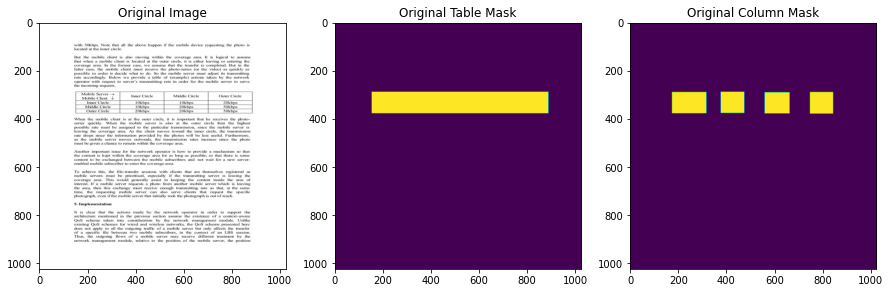

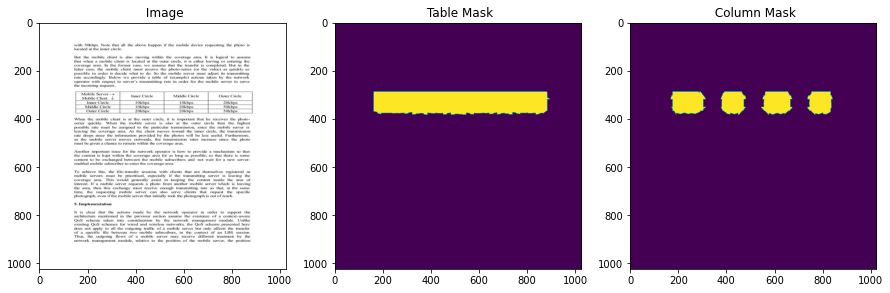

In [11]:
test_img = np.array(Image.open('../'+ test_data.iloc[20,0]))
test_table = np.array(Image.open('../'+ test_data.iloc[20,1]))
test_col = np.array(Image.open('../'+ test_data.iloc[20,2]))

display(test_img, test_table, test_col, title = 'Original')

table_out, column_out = get_TableMasks(test_img, model)
display(test_img, table_out, column_out, title = '')

##### Preprocessing the data and output of the result

In [12]:
outputs = fixMasks(test_img, table_out, column_out)

if outputs is None:
    print("No Tables Found")

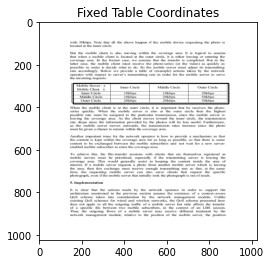

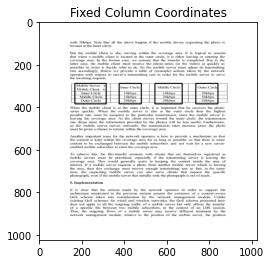

In [13]:
test_image = test_img[...,0].reshape(1024, 1024).astype(np.uint8)

image, table_boundRect, col_boundRects = outputs

#draw bounding boxes of Table Coordinates
color = (0,255,0)
thickness = 4

t_image = test_image.copy()
for x,y,w,h in table_boundRect:
    t_image = cv2.rectangle(t_image, (x,y),(x+w,y+h), color, thickness)

#plot bounding box using table mask
plt.figure()
plt.imshow(t_image, cmap = 'gray')
plt.title('Fixed Table Coordinates')
plt.show()

#Fix Column Coordinates

t_image = test_image.copy()
for c_bbox in col_boundRects:
    for x,y,w,h in c_bbox:
        t_image = cv2.rectangle(t_image, (x,y),(x+w,y+h), color, thickness)

#plot bounding box using table mask
plt.figure()
plt.imshow(t_image, cmap = 'gray')
plt.title('Fixed Column Coordinates')
plt.show()

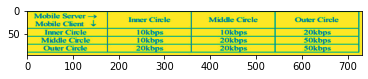

                      Mobile Server >
0                    Mobile Client_ 1
1                        Inner Circle
2                       Middle Circle
3                        Outer Circle
4   Inner Circle TOkbps TOkbps 2OKbps
5  Middle Circle 1Okbps 20kbps S0kbps
6  ‘Outer Circle 20kbps 20kbps SOkbps


In [14]:
getPredictions(test_image, table_boundRect)

## 3. sample test dataset

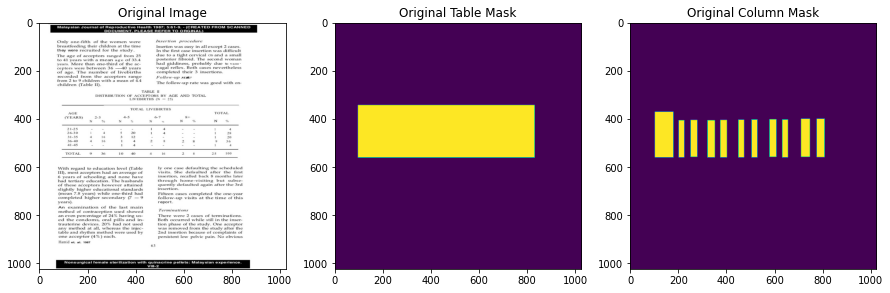

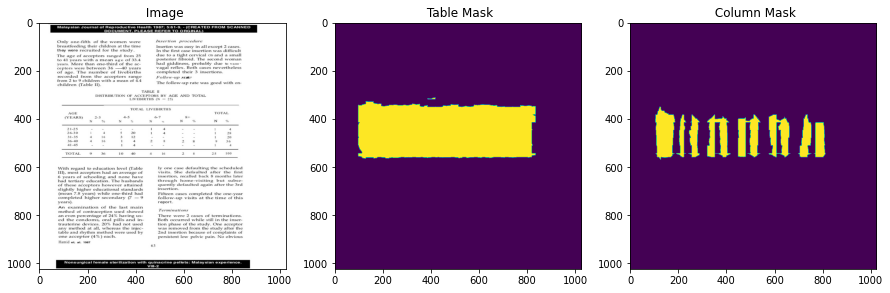

In [15]:
test_img = np.array(Image.open('../'+ test_data.iloc[30,0]))
test_table = np.array(Image.open('../'+ test_data.iloc[30,1]))
test_col = np.array(Image.open('../'+ test_data.iloc[30,2]))

display(test_img, test_table, test_col, title = 'Original')

table_out, column_out = get_TableMasks(test_img, model)
display(test_img, table_out, column_out, title = '')

##### Preprocessing the data and output of the result

In [16]:
outputs = fixMasks(test_img, table_out, column_out)

if outputs is None:
    print("No Tables Found")

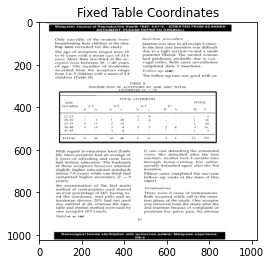

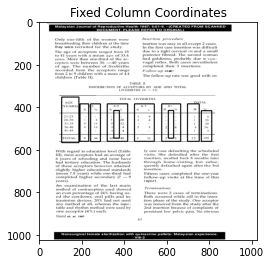

In [17]:
test_image = test_img[...,0].reshape(1024, 1024).astype(np.uint8)

image, table_boundRect, col_boundRects = outputs

#draw bounding boxes of Table Coordinates
color = (0,255,0)
thickness = 4

t_image = test_image.copy()
for x,y,w,h in table_boundRect:
    t_image = cv2.rectangle(t_image, (x,y),(x+w,y+h), color, thickness)

#plot bounding box using table mask
plt.figure()
plt.imshow(t_image, cmap = 'gray')
plt.title('Fixed Table Coordinates')
plt.show()

#Fix Column Coordinates

t_image = test_image.copy()
for c_bbox in col_boundRects:
    for x,y,w,h in c_bbox:
        t_image = cv2.rectangle(t_image, (x,y),(x+w,y+h), color, thickness)

#plot bounding box using table mask
plt.figure()
plt.imshow(t_image, cmap = 'gray')
plt.title('Fixed Column Coordinates')
plt.show()

In [18]:
table_boundRect

[(96, 328, 736, 238)]

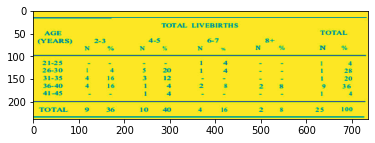

               TOTAL LIVEBIRTHS
0                      GE TOTAL
1          (YEARS) 23 45 6-7 Be
2               ’ N ’ N ~ % N %
3           21-25 - - - 1 4 - 4
4       26-30 4 5 20 1 4 2 1 28
5        31-35 16 3 12 a - e 20
6         36-40 16 1 4 2 8 8 36
7           41-45 = 1 4 . = - 4
8  TOTAL 36 10 40 4 16 8 25 100


In [19]:
getPredictions(test_image, table_boundRect)

### Samples with No Tables

## 4. sample test dataset

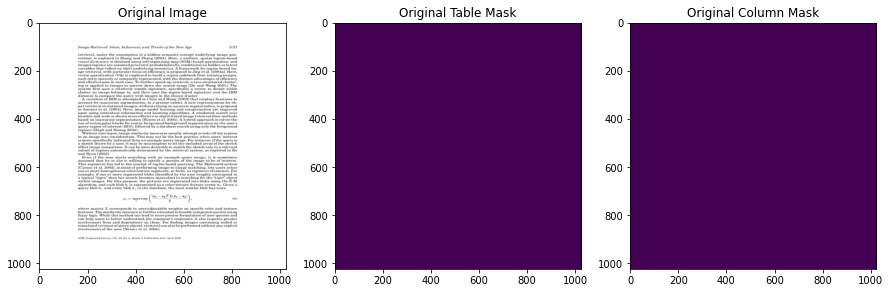

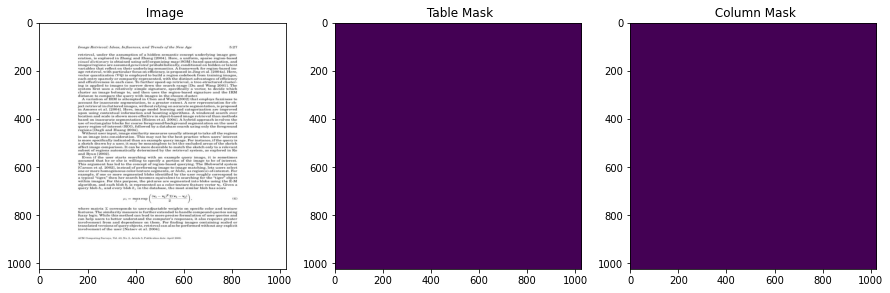

In [20]:
test_img = np.array(Image.open('../'+ test_data.iloc[0,0]))
test_table = np.array(Image.open('../'+ test_data.iloc[0,1]))
test_col = np.array(Image.open('../'+ test_data.iloc[0,2]))

display(test_img, test_table, test_col, title = 'Original')

table_out, column_out = get_TableMasks(test_img, model)
display(test_img, table_out, column_out, title = '')

##### Preprocessing the data and output of the result

In [21]:
outputs = fixMasks(test_img, table_out, column_out)

if outputs is None:
    print("No Tables Found")

No Tables Found


## 5. sample test dataset

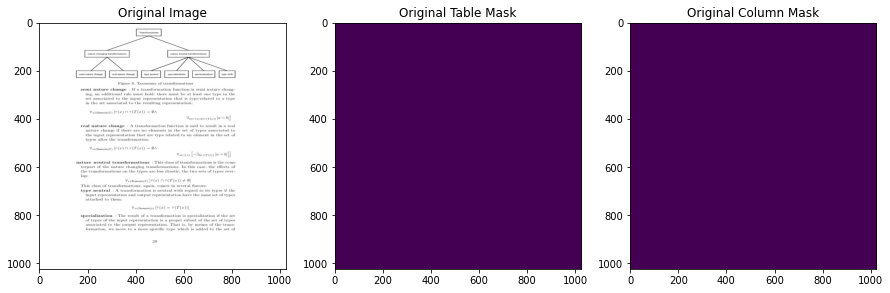

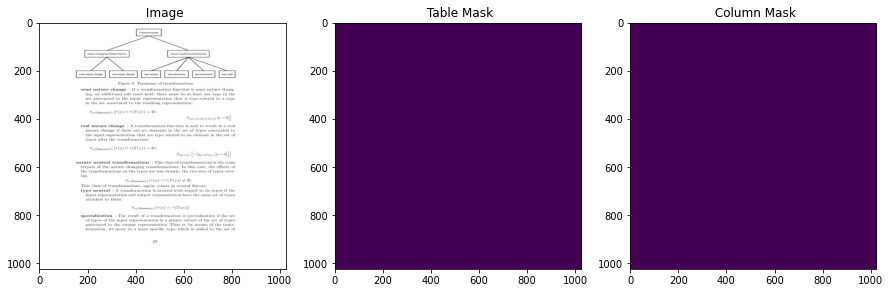

In [22]:
test_img = np.array(Image.open('../'+ test_data.iloc[2,0]))
test_table = np.array(Image.open('../'+ test_data.iloc[2,1]))
test_col = np.array(Image.open('../'+ test_data.iloc[2,2]))

display(test_img, test_table, test_col, title = 'Original')

table_out, column_out = get_TableMasks(test_img, model)
display(test_img, table_out, column_out, title = '')

##### Preprocessing the data and output of the result

In [23]:
outputs = fixMasks(test_img, table_out, column_out)

if outputs is None:
    print("No Tables Found")

No Tables Found


## 6. sample test dataset

Picking an image from icdar 2013 dataset

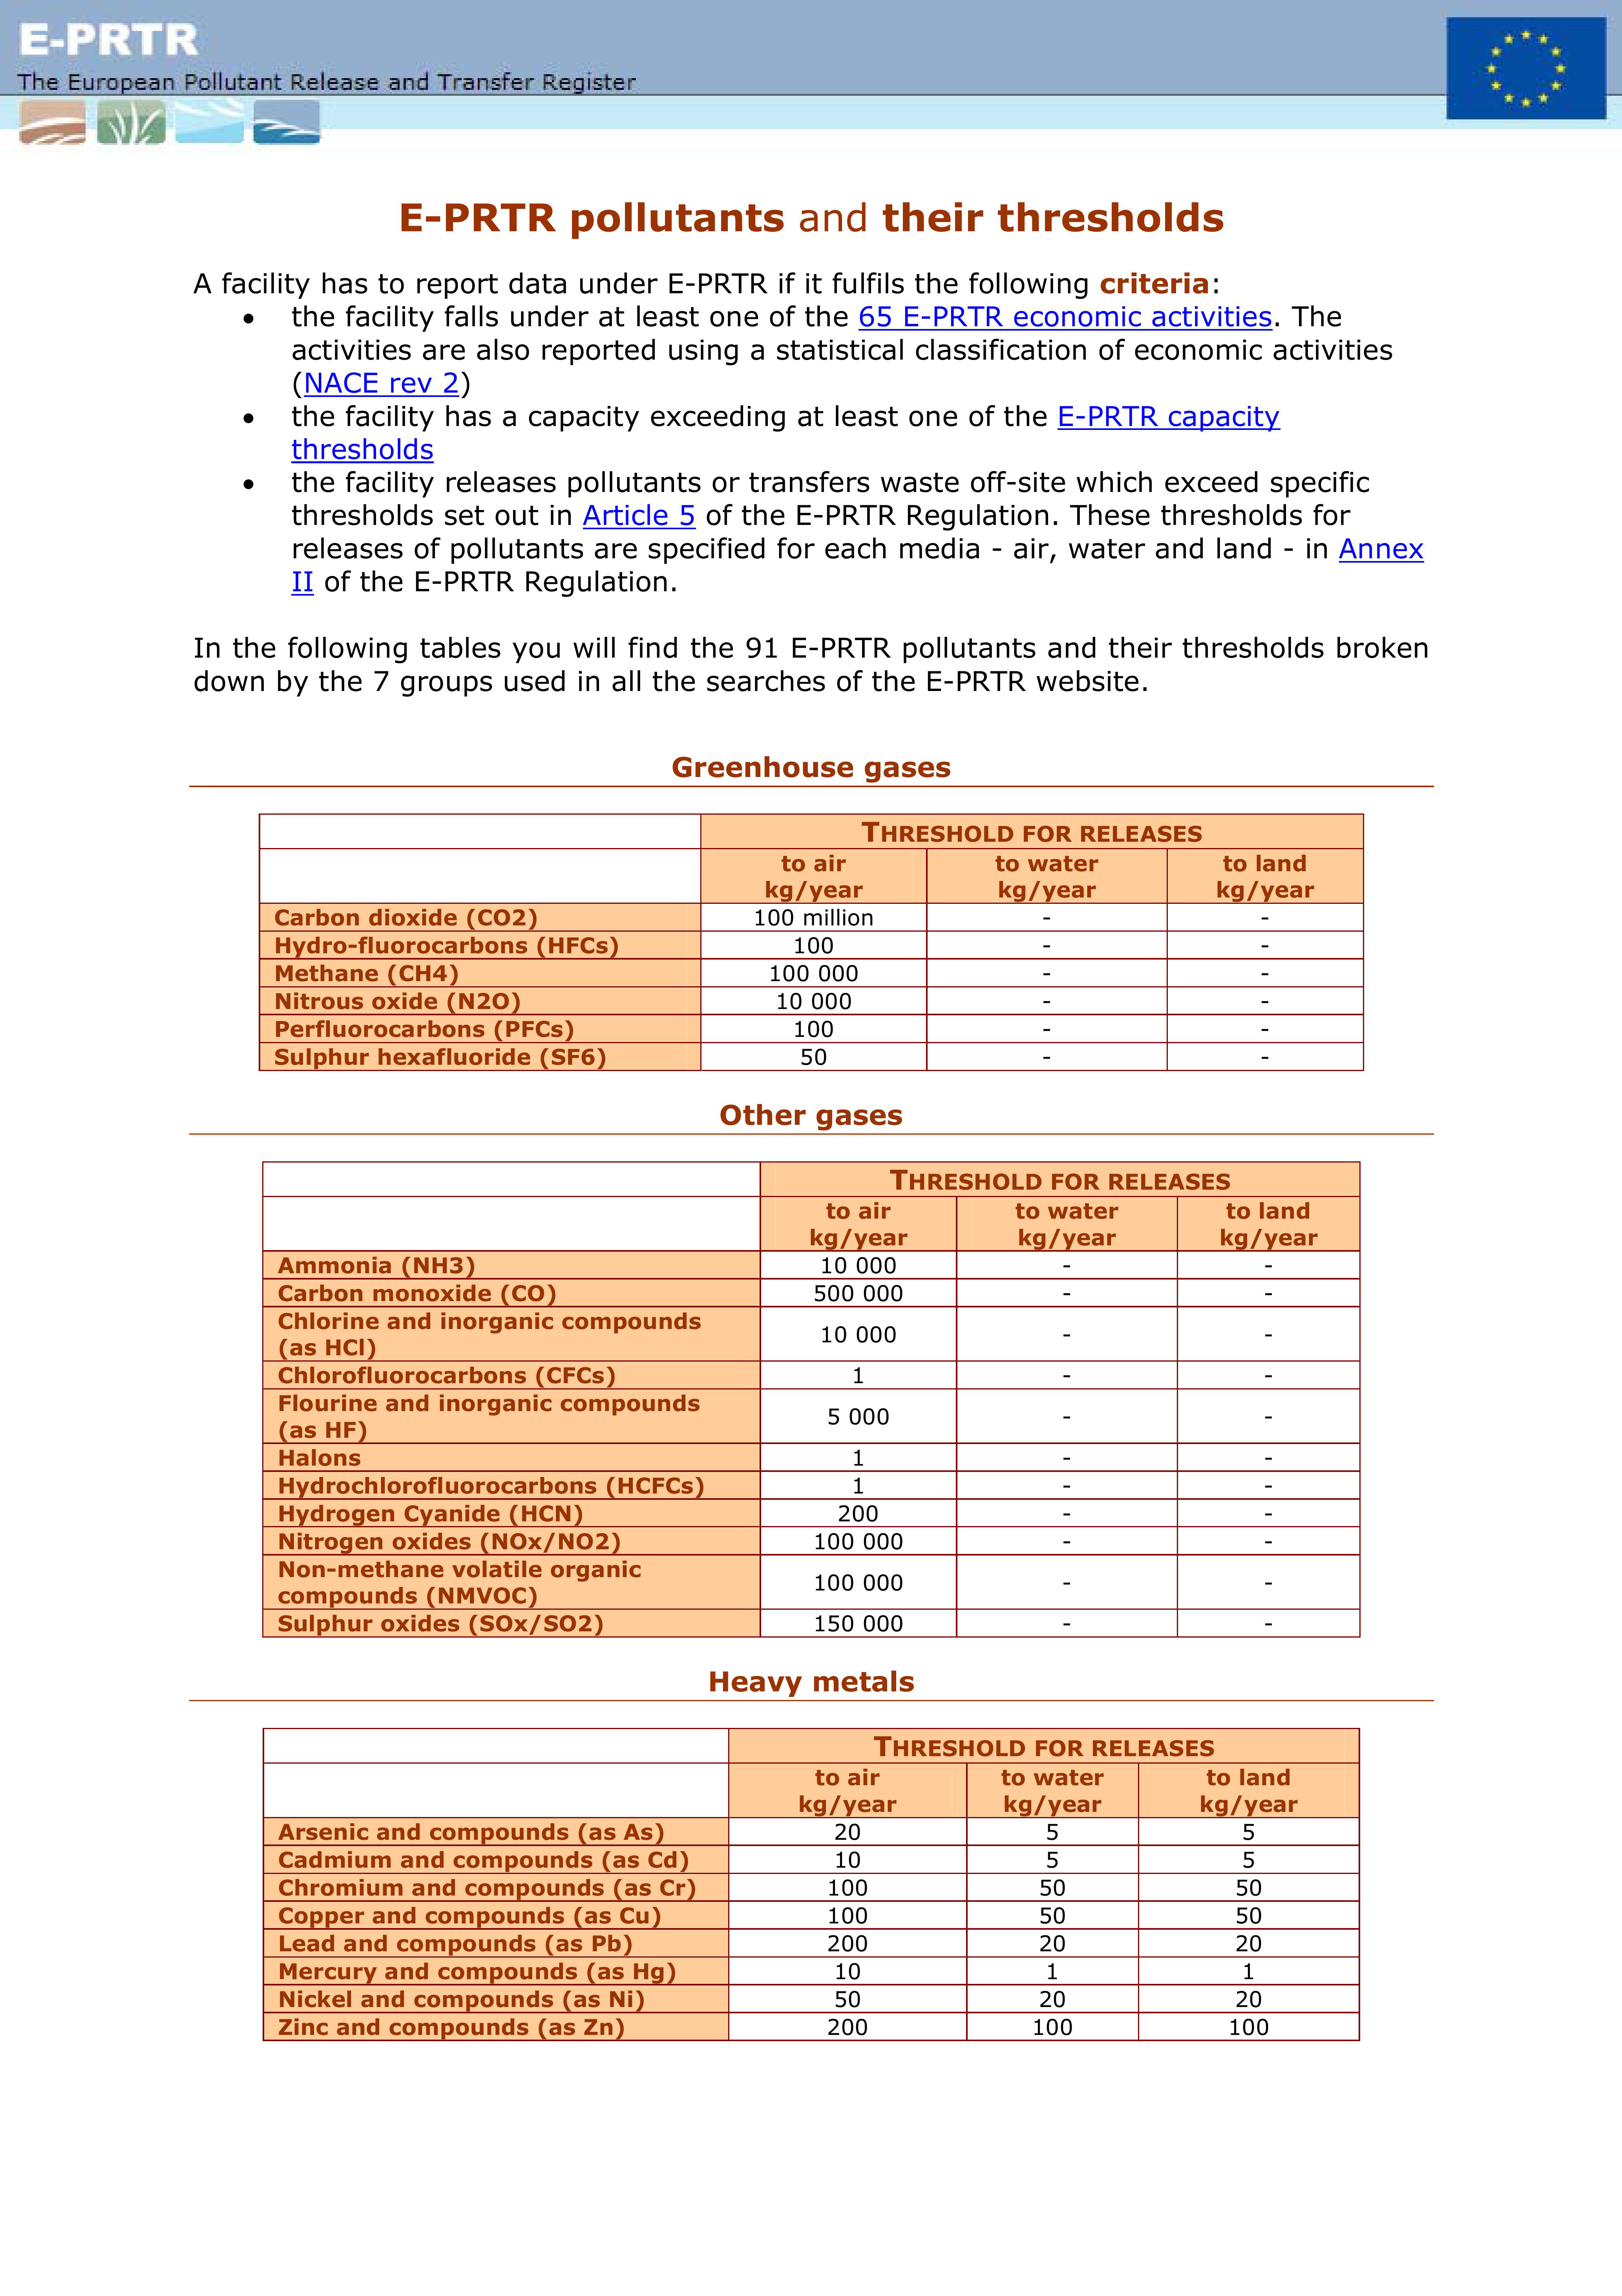

In [27]:
test_img = Image.open("page0.jpg")
test_img

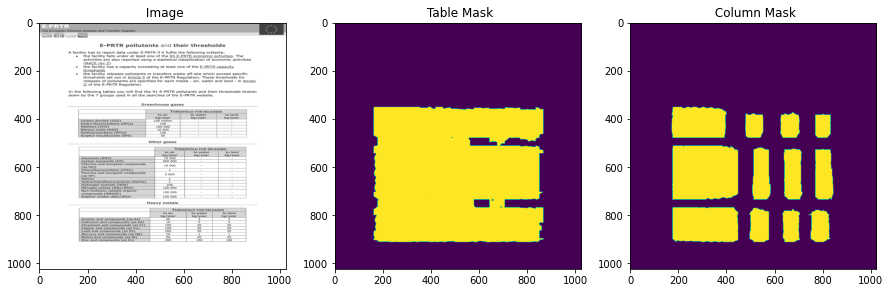

In [24]:
test_img = Image.open("page0.jpg").convert('LA')
test_img = np.array(test_img.resize((1024, 1024)).convert("RGB"))

table_out, column_out = get_TableMasks(test_img, model)
display(test_img, table_out, column_out, title = '')

In [25]:
outputs = fixMasks(test_img, table_out, column_out)

if outputs is None:
    print("No Tables Found")

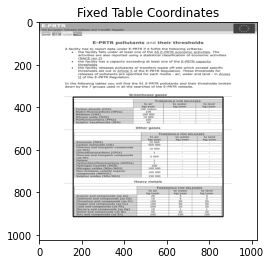

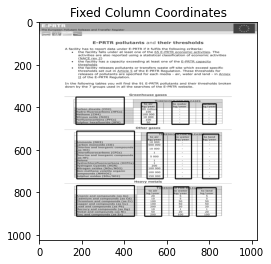

In [26]:
test_image = test_img[...,0].reshape(1024, 1024).astype(np.uint8)

image, table_boundRect, col_boundRects = outputs

#draw bounding boxes of Table Coordinates
color = (0,255,0)
thickness = 4

t_image = test_image.copy()
for x,y,w,h in table_boundRect:
    t_image = cv2.rectangle(t_image, (x,y),(x+w,y+h), color, thickness)

#plot bounding box using table mask
plt.figure()
plt.imshow(t_image, cmap = 'gray')
plt.title('Fixed Table Coordinates')
plt.show()

#Fix Column Coordinates

t_image = test_image.copy()
for c_bbox in col_boundRects:
    for x,y,w,h in c_bbox:
        t_image = cv2.rectangle(t_image, (x,y),(x+w,y+h), color, thickness)

#plot bounding box using table mask
plt.figure()
plt.imshow(t_image, cmap = 'gray')
plt.title('Fixed Column Coordinates')
plt.show()